In [1]:
import pandas as pd
import glob, os
import numpy as np
import matplotlib.pyplot as plt
import datetime  as dt
import seaborn as sns

In [2]:
ls crime_data_raw/2010

apr10.xls*  dec10.xls*  jan10.xls*  jun10.xls*  may10.xls*  oct10.xls*
aug10.xls*  feb10.xls*  jul10.xls*  mar10.xls*  nov10.xls*  sep10.xls*


In [3]:
path = 'crime_data_raw/2010'

In [4]:
ls crime_data_raw/

10years/    2008/          2011_raw.csv*  2014/          2016_raw.csv*
1985_2014/  2009/          2012/          2014_raw.csv*  2017/
2005/       2010/          2012_raw.csv*  2015/          2017_raw.csv*
2006/       2010_raw.csv*  2013/          2015_raw.csv*  premise_codes.csv*
2007/       2011/          2013_raw.csv*  2016/


In [5]:
# get premise codes

pc = pd.read_csv('crime_data_raw/premise_codes.csv')
pc.head()

,Premise Type,Premise Description
0,01A,AIRPORT TERMINAL
1,01B,BUS STATION
2,01K,RAILROAD TRACK/RIGHT OF WAY
3,01P,PARK & RIDE TERMINAL
4,01R,LIGHT RAIL VEHICLE


In [6]:
# rename premise column for easy merge
pc.rename(columns={'Premise Type': 'Premise',}, inplace=True)
pc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 2 columns):
Premise                126 non-null object
Premise Description    126 non-null object
dtypes: object(2)
memory usage: 2.0+ KB


In [7]:
# combine all files into one df
all_files = glob.glob(os.path.join(path, "*.xls")) 

df_from_each_file = (pd.read_excel(f) for f in all_files)
df   = pd.concat(df_from_each_file, ignore_index=True)

WARNING *** file size (2752234) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136263 entries, 0 to 136262
Data columns (total 12 columns):
# Of Offenses    136262 non-null float64
Beat             136262 non-null object
Block Range      136262 non-null object
Date             136262 non-null datetime64[ns]
Field11          0 non-null float64
Hour             136262 non-null float64
Offense Type     136262 non-null object
Premise          136262 non-null object
Street Name      136262 non-null object
Suffix           136262 non-null object
Type             136262 non-null object
Unnamed: 1       0 non-null float64
dtypes: datetime64[ns](1), float64(4), object(7)
memory usage: 12.5+ MB


In [9]:
df.Hour.value_counts(dropna=False)

 18.0    8492
 0.0     8491
 22.0    8097
 19.0    7870
 17.0    7707
 20.0    7662
 12.0    7467
 21.0    7288
 15.0    6568
 23.0    6480
 16.0    6447
 14.0    6065
 13.0    5819
 8.0     5496
 11.0    5164
 10.0    5138
 9.0     4672
 7.0     4596
 1.0     3896
 2.0     3332
 6.0     2985
 3.0     2636
 5.0     1994
 4.0     1900
NaN         1
Name: Hour, dtype: int64

In [10]:
df = df.dropna(subset=['Hour'])

In [11]:
df.Hour.value_counts(dropna=False)

18.0    8492
0.0     8491
22.0    8097
19.0    7870
17.0    7707
20.0    7662
12.0    7467
21.0    7288
15.0    6568
23.0    6480
16.0    6447
14.0    6065
13.0    5819
8.0     5496
11.0    5164
10.0    5138
9.0     4672
7.0     4596
1.0     3896
2.0     3332
6.0     2985
3.0     2636
5.0     1994
4.0     1900
Name: Hour, dtype: int64

In [12]:
df['Hour'] = df['Hour'].astype(int)

In [13]:
df['Hour'] = df['Hour'].astype(str) + ':00'

In [14]:
df.head()

,# Of Offenses,Beat,Block Range,Date,Field11,Hour,Offense Type,Premise,Street Name,Suffix,Type,Unnamed: 1
0,1.0,13D20,6600-6699,2010-04-17,NaN,0:00,Murder,05W,HEFFERNAN,-,-,NaN
1,1.0,11H40,10100-10199,2010-04-08,NaN,20:00,Murder,20R,LUCORE,-,-,NaN
2,2.0,19G20,11400-11499,2010-04-01,NaN,22:00,Murder,13R,CARVEL,-,LN,NaN
3,1.0,10H60,3700-3799,2010-04-17,NaN,1:00,Murder,13R,WHEELER,-,-,NaN
4,1.0,14D30,5100-5199,2010-04-08,NaN,23:00,Murder,20R,MYRTLEWOOD,-,DR,NaN


In [16]:
df[df.Date.isnull()]

,# Of Offenses,Beat,Block Range,Date,Field11,Hour,Offense Type,Premise,Street Name,Suffix,Type,Unnamed: 1


In [17]:
df.to_csv('crime_data_raw/2010_raw.csv')

In [18]:
path = 'crime_data_raw/2010_raw.csv'
df = pd.read_csv(path,parse_dates=[['Date', 'Hour']])

In [19]:
df.head()

,Date_Hour,Unnamed: 0,# Of Offenses,Beat,Block Range,Field11,Offense Type,Premise,Street Name,Suffix,Type,Unnamed: 1
0,2010-04-17 00:00:00,0,1.0,13D20,6600-6699,NaN,Murder,05W,HEFFERNAN,-,-,NaN
1,2010-04-08 20:00:00,1,1.0,11H40,10100-10199,NaN,Murder,20R,LUCORE,-,-,NaN
2,2010-04-01 22:00:00,2,2.0,19G20,11400-11499,NaN,Murder,13R,CARVEL,-,LN,NaN
3,2010-04-17 01:00:00,3,1.0,10H60,3700-3799,NaN,Murder,13R,WHEELER,-,-,NaN
4,2010-04-08 23:00:00,4,1.0,14D30,5100-5199,NaN,Murder,20R,MYRTLEWOOD,-,DR,NaN


## Inspect Premise col

In [20]:
len(df.Premise.value_counts(dropna=False))

128

In [21]:
df.Premise.value_counts(dropna=False).head()

20A    17848
20R    17426
18A    15614
13R    10029
20D     9793
Name: Premise, dtype: int64

In [22]:
df.Premise.unique()

array(['05W', '20R', '13R', '20A', '18A', '100', '05E', '20D', '18T',
       '250', '040', '13A', '20P', '22M', '140', '070', '14V', '05V',
       '18R', '18C', '18G', '18O', '18M', '18S', '13B', '05D', '22E',
       '240', '18U', '13S', '13H', '210', '120', '080', '24A', '24J',
       '24E', '03B', '05Q', '05B', '05Z', '18N', '05L', '05C', '24F',
       '09D', '24P', '23S', '18P', '18H', '01K', '20G', '05P', '05F',
       '02B', '09P', '05R', '05O', '22P', '11R', '170', '20M', '20L',
       '05M', '18B', '09H', '20V', '22D', '18L', '05X', '13T', '20W',
       '03S', '18D', '20C', '150', '18W', '22H', '20N', '22C', '05Y',
       '20H', '25V', '05A', '190', '24G', '24V', '24C', '05G', '12V',
       '09R', '21V', '060', '19V', '05H', '05U', '11S', '05N', '11V',
       '24S', '11G', '160', '05T', '01T', '01A', '05S', '01B', '22U',
       '24B', '---', '24T', '11L', '02C', '11P', '24M', '02S', '11F',
       '09V', '22V', '01P', '25R', '11C', '04V', '23C', '01R', 'RES',
       '13C', '02V']

In [23]:
df.Premise = df.Premise.str.strip()

In [24]:
len(df.Premise.value_counts(dropna=False))

128

In [25]:
df.Premise.value_counts(dropna=False).head()

20A    17848
20R    17426
18A    15614
13R    10029
20D     9793
Name: Premise, dtype: int64

In [26]:
# check if  null values
df.isnull().values.any().any()

True

In [27]:
# check su, of null values
df.isnull().values.sum()

272524

In [28]:
len(df[df.isnull().any(axis=1)])

136262

## Visualize our data

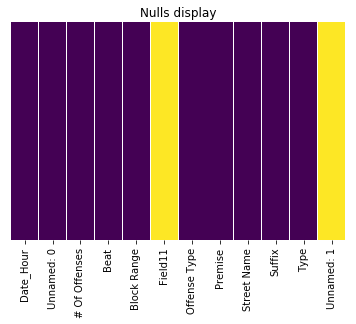

In [29]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Nulls display')
plt.show()

## col cleaning

- joining similar columns
- renaming

In [30]:
df.head()

,Date_Hour,Unnamed: 0,# Of Offenses,Beat,Block Range,Field11,Offense Type,Premise,Street Name,Suffix,Type,Unnamed: 1
0,2010-04-17 00:00:00,0,1.0,13D20,6600-6699,NaN,Murder,05W,HEFFERNAN,-,-,NaN
1,2010-04-08 20:00:00,1,1.0,11H40,10100-10199,NaN,Murder,20R,LUCORE,-,-,NaN
2,2010-04-01 22:00:00,2,2.0,19G20,11400-11499,NaN,Murder,13R,CARVEL,-,LN,NaN
3,2010-04-17 01:00:00,3,1.0,10H60,3700-3799,NaN,Murder,13R,WHEELER,-,-,NaN
4,2010-04-08 23:00:00,4,1.0,14D30,5100-5199,NaN,Murder,20R,MYRTLEWOOD,-,DR,NaN


In [31]:
# # 2014
# # if duplicate columns

# df['BlockRange'] = pd.concat([df['Block Range'].dropna(),
#                               df['BlockRange'].dropna()]).reindex_like(df)

# df['StreetName'] = pd.concat([df['Street Name'].dropna(),
#                               df['StreetName'].dropna()]).reindex_like(df)

# df['# Of Offenses'] = pd.concat([df['# Of'].dropna(),
#                               df['# Of Offenses'].dropna(),
#                               df['# offenses'].dropna(),
#                               df['# Offenses'].dropna()]).reindex_like(df)

In [32]:
df.head()

,Date_Hour,Unnamed: 0,# Of Offenses,Beat,Block Range,Field11,Offense Type,Premise,Street Name,Suffix,Type,Unnamed: 1
0,2010-04-17 00:00:00,0,1.0,13D20,6600-6699,NaN,Murder,05W,HEFFERNAN,-,-,NaN
1,2010-04-08 20:00:00,1,1.0,11H40,10100-10199,NaN,Murder,20R,LUCORE,-,-,NaN
2,2010-04-01 22:00:00,2,2.0,19G20,11400-11499,NaN,Murder,13R,CARVEL,-,LN,NaN
3,2010-04-17 01:00:00,3,1.0,10H60,3700-3799,NaN,Murder,13R,WHEELER,-,-,NaN
4,2010-04-08 23:00:00,4,1.0,14D30,5100-5199,NaN,Murder,20R,MYRTLEWOOD,-,DR,NaN


In [33]:
# df.rename(columns={
#     '# Of Offenses': 'NumOffenses',
#      'Offense Type': 'OffenseType',
# }, inplace=True)
# df.info()

In [34]:
df.rename(columns={
    '# Of Offenses': 'NumOffenses',
     'Offense Type': 'OffenseType',
    'Block Range': 'BlockRange',
    'Street Name': 'StreetName'
}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136262 entries, 0 to 136261
Data columns (total 12 columns):
Date_Hour      136262 non-null datetime64[ns]
Unnamed: 0     136262 non-null int64
NumOffenses    136262 non-null float64
Beat           136262 non-null object
BlockRange     136262 non-null object
Field11        0 non-null float64
OffenseType    136262 non-null object
Premise        136262 non-null object
StreetName     136262 non-null object
Suffix         136262 non-null object
Type           136262 non-null object
Unnamed: 1     0 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(1), object(7)
memory usage: 12.5+ MB


## Subset dataframe to work on 

In [35]:
crimes = df[['Date_Hour','Beat','BlockRange','StreetName','OffenseType','Premise','NumOffenses']]
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136262 entries, 0 to 136261
Data columns (total 7 columns):
Date_Hour      136262 non-null datetime64[ns]
Beat           136262 non-null object
BlockRange     136262 non-null object
StreetName     136262 non-null object
OffenseType    136262 non-null object
Premise        136262 non-null object
NumOffenses    136262 non-null float64
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 7.3+ MB


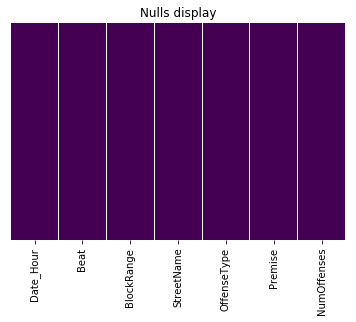

In [36]:
sns.heatmap(crimes.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Nulls display')
plt.show()

# FIND NAN onevery col

In [37]:
len(crimes[crimes.Date_Hour.isnull()])

0

In [38]:
crimes[crimes.Date_Hour.isnull()]

,Date_Hour,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses


In [39]:
len(crimes[crimes.Beat.isnull()])

0

In [40]:
crimes[crimes.Beat.isnull()]

,Date_Hour,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses


In [41]:
len(crimes[crimes.BlockRange.isnull()])

0

In [42]:
crimes[crimes.BlockRange.isnull()]

,Date_Hour,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses


In [43]:
len(crimes[crimes.StreetName.isnull()])

0

In [44]:
crimes[crimes.StreetName.isnull()]

,Date_Hour,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses


In [45]:
len(crimes[crimes.OffenseType.isnull()])

0

In [46]:
crimes[crimes.OffenseType.isnull()]

,Date_Hour,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses


In [47]:
len(crimes[crimes.Premise.isnull()])

0

In [48]:
crimes[crimes.Premise.isnull()]

,Date_Hour,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses


In [49]:
len(crimes[crimes.NumOffenses.isnull()])

0

In [50]:
crimes[crimes.NumOffenses.isnull()]

,Date_Hour,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses


## Find NaN
- drop if > 2 nan

In [52]:
len(crimes[crimes.isnull().any(axis=1)])

0

In [53]:
crimes[crimes.isnull().any(axis=1)]

,Date_Hour,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses


In [54]:
#crimes = crimes.dropna(thresh=2)

In [55]:
#crimes[crimes.isnull().any(axis=1)]

## Joint dataframes

In [56]:
# join two datarames
crimes = pd.merge(crimes, pc, on='Premise', how='outer')
crimes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136263 entries, 0 to 136262
Data columns (total 8 columns):
Date_Hour              136262 non-null datetime64[ns]
Beat                   136262 non-null object
BlockRange             136262 non-null object
StreetName             136262 non-null object
OffenseType            136262 non-null object
Premise                136263 non-null object
NumOffenses            136262 non-null float64
Premise Description    136214 non-null object
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 9.4+ MB


In [57]:
crimes.head()

,Date_Hour,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Premise Description
0,2010-04-17 00:00:00,13D20,6600-6699,HEFFERNAN,Murder,05W,1.0,WAREHOUSE
1,2010-04-01 00:00:00,14D20,3400-3499,CORDER,Burglary,05W,1.0,WAREHOUSE
2,2010-04-08 23:00:00,6B40,10200-10299,NORTH,Burglary,05W,1.0,WAREHOUSE
3,2010-04-23 19:00:00,13D10,6100-6199,SOUTH LP E,Burglary,05W,1.0,WAREHOUSE
4,2010-04-06 17:00:00,3B10,5900-5999,CENTRALCREST,Burglary,05W,1.0,WAREHOUSE


In [58]:
len(crimes[crimes['Premise Description'].isnull()])

49

In [59]:
crimes[crimes['Premise Description'].isnull()].head()

,Date_Hour,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Premise Description
135899,2010-04-29 21:00:00,18F50,3200-3299,GESSNER,Theft,---,1.0,NaN
135900,2010-07-29 18:00:00,19G10,8800-8899,BOONE,Rape,---,1.0,NaN
135901,2010-08-18 18:00:00,20G10,10000-10099,WESTPARK,Aggravated Assault,---,1.0,NaN
135902,2010-08-23 08:00:00,16E30,5100-5199,KELLING,Aggravated Assault,---,1.0,NaN
135903,2007-02-05 08:00:00,1A30,2400-2499,RICHMOND,Auto Theft,---,1.0,NaN


## Problem
- find nan values on one col, and copy related col

In [60]:
crimes.Premise.unique()

array(['05W', '20R', '13R', '20A', '18A', '100', '05E', '20D', '18T',
       '250', '040', '13A', '20P', '22M', '140', '070', '14V', '05V',
       '18R', '18C', '18G', '18O', '18M', '18S', '13B', '05D', '22E',
       '240', '18U', '13S', '13H', '210', '120', '080', '24A', '24J',
       '24E', '03B', '05Q', '05B', '05Z', '18N', '05L', '05C', '24F',
       '09D', '24P', '23S', '18P', '18H', '01K', '20G', '05P', '05F',
       '02B', '09P', '05R', '05O', '22P', '11R', '170', '20M', '20L',
       '05M', '18B', '09H', '20V', '22D', '18L', '05X', '13T', '20W',
       '03S', '18D', '20C', '150', '18W', '22H', '20N', '22C', '05Y',
       '20H', '25V', '05A', '190', '24G', '24V', '24C', '05G', '12V',
       '09R', '21V', '060', '19V', '05H', '05U', '11S', '05N', '11V',
       '24S', '11G', '160', '05T', '01T', '01A', '05S', '01B', '22U',
       '24B', '---', '24T', '11L', '02C', '11P', '24M', '02S', '11F',
       '09V', '22V', '01P', '25R', '11C', '04V', '23C', '01R', 'RES',
       '13C', '02V',

In [61]:
len(crimes[crimes['Premise'] == '---'])

45

In [62]:
len(crimes[crimes['Premise'] == 'N'])

0

In [63]:
crimes[crimes['Premise'] == 'N']

,Date_Hour,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Premise Description


In [64]:
crimes.loc[crimes['Premise Description'].isnull(),'Premise Description'] = crimes['Premise']

In [65]:
len(crimes[crimes['Premise Description'].isnull()])

0

In [66]:

crimes[crimes['Premise Description'].isnull()]

,Date_Hour,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Premise Description


## Visualize data

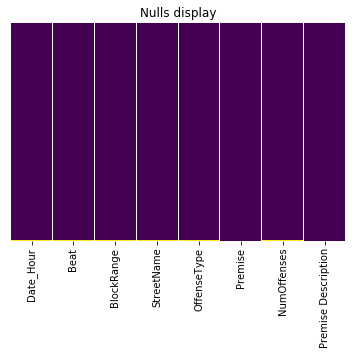

In [67]:
sns.heatmap(crimes.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Nulls display')
plt.show()

## Display any null values

In [68]:
len(crimes[crimes.isnull().any(axis=1)])

1

In [69]:
crimes[crimes.isnull().any(axis=1)].tail()

,Date_Hour,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Premise Description
136262,NaT,NaN,NaN,NaN,NaN,15V,NaN,VACANT JAIL/PRISON


## drop rows with 2 or 3 or more NaN

In [70]:
crimes = crimes.dropna(thresh=3)

In [71]:
len(crimes[crimes.isnull().any(axis=1)])

0

In [72]:
crimes[crimes.isnull().any(axis=1)].tail()

,Date_Hour,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Premise Description


## Inspect each column

In [73]:
crimes.dtypes

Date_Hour              datetime64[ns]
Beat                           object
BlockRange                     object
StreetName                     object
OffenseType                    object
Premise                        object
NumOffenses                   float64
Premise Description            object
dtype: object

## Beat

In [74]:
len(crimes.Beat.value_counts())

122

In [75]:
len(crimes.Beat.value_counts(dropna=False))

122

In [76]:
crimes.Beat.unique()

array(['13D20', '14D20', '6B40', '13D10', '3B10', '10H10', '3B30',
       '15E40', '3B50', '9C20', '10H70', '5F30', '9C10', '3B40', '4F30',
       '14D10', '5F20', '13D30', '7C10', '6B30', '10H30', '14D50', '6B20',
       '18F50', '2A60', '11H10', '19G50', '9C30', '7C20', '16E10',
       '11H50', '10H20', '2A40', '20G10', '6B60', '11H20', '14D30',
       '18F30', '20G30', '8C40', '13D40', '2A30', '18F10', '15E30',
       '16E30', '2A20', '7C50', '7C30', '17E20', '2A10', '17E30', '16E20',
       '15E20', '1A50', '5F10', '14D40', '4F20', '2A50', '19G40', '5F40',
       '18F60', '20G40', '17E10', '10H50', '20G50', '8C20', '20G70',
       '20G60', '7C40', '8C10', '6B10', '4F10', '18F40', '15E10', '12D40',
       '11H40', '19G30', '16E40', 'UNK', '9C40', '12D10', '8C60', '10H80',
       '8C50', '18F20', '17E40', '1A20', '24C10', '8C30', '11H30',
       '24C40', '12D50', '10H60', '12D20', '24C30', '12D70', '20G20',
       '20G80', '19G10', '19G20', '10H40', '6B50', '12D60', '1A30',
       '2

In [77]:
# replace extra ' with empty space
crimes['Beat'] = crimes.Beat.str.replace("'", " ")

In [78]:
len(crimes.Beat.value_counts(dropna=False))

122

In [79]:
# strip empty spaces
crimes.Beat = crimes.Beat.str.strip()

In [80]:
len(crimes.Beat.value_counts(dropna=False))  # get the total

122

In [81]:
crimes.Beat.unique()

array(['13D20', '14D20', '6B40', '13D10', '3B10', '10H10', '3B30',
       '15E40', '3B50', '9C20', '10H70', '5F30', '9C10', '3B40', '4F30',
       '14D10', '5F20', '13D30', '7C10', '6B30', '10H30', '14D50', '6B20',
       '18F50', '2A60', '11H10', '19G50', '9C30', '7C20', '16E10',
       '11H50', '10H20', '2A40', '20G10', '6B60', '11H20', '14D30',
       '18F30', '20G30', '8C40', '13D40', '2A30', '18F10', '15E30',
       '16E30', '2A20', '7C50', '7C30', '17E20', '2A10', '17E30', '16E20',
       '15E20', '1A50', '5F10', '14D40', '4F20', '2A50', '19G40', '5F40',
       '18F60', '20G40', '17E10', '10H50', '20G50', '8C20', '20G70',
       '20G60', '7C40', '8C10', '6B10', '4F10', '18F40', '15E10', '12D40',
       '11H40', '19G30', '16E40', 'UNK', '9C40', '12D10', '8C60', '10H80',
       '8C50', '18F20', '17E40', '1A20', '24C10', '8C30', '11H30',
       '24C40', '12D50', '10H60', '12D20', '24C30', '12D70', '20G20',
       '20G80', '19G10', '19G20', '10H40', '6B50', '12D60', '1A30',
       '2

In [82]:
crimes.Beat.value_counts(dropna=False).head()

19G10    3010
12D10    2889
6B60     2732
3B10     2702
1A20     2612
Name: Beat, dtype: int64

## BlockRange

In [83]:
len(crimes.BlockRange.value_counts(dropna=False))

249

In [84]:
crimes.BlockRange.value_counts(dropna=False).head()

900-999      2079
7900-7999    1741
100-199      1734
800-899      1679
9400-9499    1669
Name: BlockRange, dtype: int64

In [85]:
# strip
crimes.BlockRange = crimes.BlockRange.str.strip()

In [86]:
len(crimes.BlockRange.value_counts(dropna=False))

249

## StreetName

In [87]:
print('before:{}'.format(len(crimes.StreetName.value_counts(dropna=False))))

before:7832


In [88]:
crimes.StreetName = crimes.StreetName.str.strip()

In [89]:
print('after:{}'.format(len(crimes.StreetName.value_counts(dropna=False))))

after:7832


In [90]:
print(crimes.StreetName.value_counts(dropna=False).head())

WESTHEIMER    3716
GESSNER       2226
GULF          1931
RICHMOND      1683
SOUTHWEST     1515
Name: StreetName, dtype: int64


## OffenseType

In [91]:
print('before:{}'.format(len(crimes.OffenseType.value_counts(dropna=False))))

before:7


In [92]:
crimes.OffenseType = crimes.OffenseType.str.strip()

In [93]:
print('after:{}'.format(len(crimes.OffenseType.value_counts(dropna=False))))

after:7


In [94]:
print(crimes.OffenseType.value_counts(dropna=False))

Theft                 74581
Burglary              27924
Auto Theft            12424
Aggravated Assault    10915
Robbery                9449
Rape                    709
Murder                  260
Name: OffenseType, dtype: int64


## Premise

In [95]:
print('before:{}'.format(len(crimes.Premise.value_counts(dropna=False))))

before:128


In [96]:
crimes.Premise = crimes.Premise.str.strip()

In [97]:
print('after:{}'.format(len(crimes.Premise.value_counts(dropna=False))))

after:128


In [98]:
crimes.Premise.value_counts(dropna=False).head()

20A    17848
20R    17426
18A    15614
13R    10029
20D     9793
Name: Premise, dtype: int64

## Premise Description

In [99]:
print('before:{}'.format(len(crimes['Premise Description'].value_counts(dropna=False))))

before:128


In [100]:
#crimes.Beat = crimes.Beat.str.replace(r"\'(.+?)\'", ' ')
crimes['Premise Description'] = crimes['Premise Description'].str.strip()

In [101]:
print('after:{}'.format(len(crimes['Premise Description'].value_counts(dropna=False))))

after:128


In [102]:
print(crimes['Premise Description'].value_counts(dropna=False).head())

APARTMENT                17848
RESIDENCE/HOUSE          17426
APARTMENT PARKING LOT    15614
ROAD/STREET/SIDEWALK     10029
DRIVEWAY                  9793
Name: Premise Description, dtype: int64


,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Premise Description,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,,
1959-06-06 14:00:00,18F20,5100-5199,RICHMOND,Theft,080,1.0,DEPARTMENT/DISCOUNT STORE,14,06,Saturday,Jun,1959
1966-01-01 00:00:00,10H50,3300-3399,ALABAMA,Rape,20A,1.0,APARTMENT,00,01,Saturday,Jan,1966
1966-07-18 13:00:00,13D40,10200-10299,TELEPHONE,Auto Theft,18A,1.0,APARTMENT PARKING LOT,13,18,Monday,Jul,1966
1969-07-22 00:00:00,2A30,1500-1599,NICHOLSON,Theft,20R,1.0,RESIDENCE/HOUSE,00,22,Tuesday,Jul,1969
1969-11-26 15:00:00,3B50,7100-7199,IRVINGTON,Theft,13R,1.0,ROAD/STREET/SIDEWALK,15,26,Wednesday,Nov,1969
1974-02-12 08:00:00,18F40,7900-7999,WESTHEIMER,Burglary,---,1.0,---,08,12,Tuesday,Feb,1974
1974-04-27 11:00:00,14D30,5900-5999,WESTOVER,Burglary,20R,1.0,RESIDENCE/HOUSE,11,27,Saturday,Apr,1974
1977-02-01 18:00:00,12D70,500-599,BAYBROOK MALL,Theft,18U,1.0,MALL PARKING LOT,18,01,Tuesday,Feb,1977
1980-05-14 00:00:00,23J50,7800-7899,AIRPORT,Theft,01A,1.0,AIRPORT TERMINAL,00,14,Wednesday,May,1980


# Set Date as index

In [107]:
# date
crimes.Date_Hour = pd.to_datetime(crimes.Date_Hour)

crimes = crimes.set_index('Date_Hour').sort_index(ascending=True)

AttributeError: 'DataFrame' object has no attribute 'Date_Hour'

In [105]:
crimes.head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Premise Description
Date_Hour,,,,,,,
1959-06-06 14:00:00,18F20,5100-5199,RICHMOND,Theft,080,1.0,DEPARTMENT/DISCOUNT STORE
1966-01-01 00:00:00,10H50,3300-3399,ALABAMA,Rape,20A,1.0,APARTMENT
1966-07-18 13:00:00,13D40,10200-10299,TELEPHONE,Auto Theft,18A,1.0,APARTMENT PARKING LOT
1969-07-22 00:00:00,2A30,1500-1599,NICHOLSON,Theft,20R,1.0,RESIDENCE/HOUSE
1969-11-26 15:00:00,3B50,7100-7199,IRVINGTON,Theft,13R,1.0,ROAD/STREET/SIDEWALK


## Create Columns with day,weekday,month,year from date index

In [109]:
# get day, weekday,month ,year
crimes['Hour'] = crimes.index.strftime('%H')
crimes['day'] = crimes.index.strftime('%d')
crimes['weekday'] = crimes.index.strftime('%A')
crimes['month'] = crimes.index.strftime('%b')
crimes['year'] = crimes.index.strftime('%Y')

In [110]:
crimes.head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Premise Description,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,,
1959-06-06 14:00:00,18F20,5100-5199,RICHMOND,Theft,080,1.0,DEPARTMENT/DISCOUNT STORE,14,06,Saturday,Jun,1959
1966-01-01 00:00:00,10H50,3300-3399,ALABAMA,Rape,20A,1.0,APARTMENT,00,01,Saturday,Jan,1966
1966-07-18 13:00:00,13D40,10200-10299,TELEPHONE,Auto Theft,18A,1.0,APARTMENT PARKING LOT,13,18,Monday,Jul,1966
1969-07-22 00:00:00,2A30,1500-1599,NICHOLSON,Theft,20R,1.0,RESIDENCE/HOUSE,00,22,Tuesday,Jul,1969
1969-11-26 15:00:00,3B50,7100-7199,IRVINGTON,Theft,13R,1.0,ROAD/STREET/SIDEWALK,15,26,Wednesday,Nov,1969


## null values

- check
- count
- display

In [111]:
crimes.isnull().values.any().any()

False

In [112]:
# display any null

len(crimes[crimes.isnull().any(axis=1)])

0

In [113]:
crimes[crimes.isnull().any(axis=1)]

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Premise Description,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,,


In [114]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 136262 entries, 1959-06-06 14:00:00 to 2011-01-06 06:00:00
Data columns (total 12 columns):
Beat                   136262 non-null object
BlockRange             136262 non-null object
StreetName             136262 non-null object
OffenseType            136262 non-null object
Premise                136262 non-null object
NumOffenses            136262 non-null float64
Premise Description    136262 non-null object
Hour                   136262 non-null object
day                    136262 non-null object
weekday                136262 non-null object
month                  136262 non-null object
year                   136262 non-null object
dtypes: float64(1), object(11)
memory usage: 18.5+ MB


## New Dataframe
- remove premise col
- keep premise description

In [115]:
crime_yr = crimes[['Beat','BlockRange','StreetName','OffenseType','Premise Description','NumOffenses','Hour','day','weekday','month','year']]
crime_yr.head()

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,
1959-06-06 14:00:00,18F20,5100-5199,RICHMOND,Theft,DEPARTMENT/DISCOUNT STORE,1.0,14,06,Saturday,Jun,1959
1966-01-01 00:00:00,10H50,3300-3399,ALABAMA,Rape,APARTMENT,1.0,00,01,Saturday,Jan,1966
1966-07-18 13:00:00,13D40,10200-10299,TELEPHONE,Auto Theft,APARTMENT PARKING LOT,1.0,13,18,Monday,Jul,1966
1969-07-22 00:00:00,2A30,1500-1599,NICHOLSON,Theft,RESIDENCE/HOUSE,1.0,00,22,Tuesday,Jul,1969
1969-11-26 15:00:00,3B50,7100-7199,IRVINGTON,Theft,ROAD/STREET/SIDEWALK,1.0,15,26,Wednesday,Nov,1969


In [116]:
crime_yr.isnull().values.any().any()

False

In [117]:
# display any null

len(crime_yr[crime_yr.isnull().any(axis=1)])

0

In [118]:
crime_yr[crime_yr.isnull().any(axis=1)]

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,


# FIND NANS

## INDEX

In [119]:
len(crime_yr[crime_yr.index.isnull()])

0

In [120]:
crime_yr[crime_yr.index.isnull()]

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,


In [121]:
# drop index nans
crime_yr.index.dropna(how='any')

DatetimeIndex(['1959-06-06 14:00:00', '1966-01-01 00:00:00',
               '1966-07-18 13:00:00', '1969-07-22 00:00:00',
               '1969-11-26 15:00:00', '1974-02-12 08:00:00',
               '1974-04-27 11:00:00', '1977-02-01 18:00:00',
               '1980-05-14 00:00:00', '1980-10-01 09:00:00',
               ...
               '2010-12-31 22:00:00', '2010-12-31 22:00:00',
               '2010-12-31 22:00:00', '2010-12-31 23:00:00',
               '2010-12-31 23:00:00', '2010-12-31 23:00:00',
               '2010-12-31 23:00:00', '2010-12-31 23:00:00',
               '2011-01-01 00:00:00', '2011-01-06 06:00:00'],
              dtype='datetime64[ns]', name='Date_Hour', length=136262, freq=None)

In [122]:
len(crime_yr[crime_yr.index.isnull()])

0

## Beat

In [123]:
len(crime_yr[crime_yr.Beat.isnull()])

0

In [124]:
crime_yr[crime_yr.Beat.isnull()].head()

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,


In [125]:
crime_yr.Beat = crime_yr.Beat.replace(np.nan, 'UNK')

/home/frank/miniconda3/envs/springboard/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [126]:
len(crime_yr[crime_yr.Beat.isnull()])

0

In [127]:
crime_yr[crime_yr.Beat.isnull()]

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,


## BlockRAnge

In [128]:
len(crime_yr[crime_yr.BlockRange.isnull()])

0

In [129]:
crime_yr[crime_yr.BlockRange.isnull()].head()

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,


## StreetName

In [130]:
len(crime_yr[crime_yr.StreetName.isnull()])

0

In [131]:
crime_yr[crime_yr.StreetName.isnull()].head()

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,


## OffenseType

In [132]:
len(crime_yr[crime_yr.OffenseType.isnull()])

0

In [133]:
crime_yr[crime_yr.OffenseType.isnull()]

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,


## Hour

In [134]:
len(crime_yr[crime_yr.Hour.isnull()])

0

In [135]:
crime_yr[crime_yr.Hour.isnull()].head()

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,


## Premsie Description

In [136]:
len(crime_yr[crime_yr['Premise Description'].isnull()])

0

In [137]:
crime_yr[crime_yr['Premise Description'].isnull()].head()

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,


In [138]:
crime_yr['Premise Description'] = crime_yr['Premise Description'].replace(np.nan, 'No label')

/home/frank/miniconda3/envs/springboard/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [139]:
len(crime_yr[crime_yr['Premise Description'].isnull()])

0

In [140]:
crime_yr[crime_yr['Premise Description'].isnull()]

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,


In [141]:
# display any null

len(crime_yr[crime_yr.isnull().any(axis=1)])

0

In [142]:
crime_yr[crime_yr.isnull().any(axis=1)]

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,


## Save

In [143]:
# change column name from Premise Descriptionto Premise

crime_yr.rename(columns={
    'Premise Description': 'Premise',}, inplace=True)
crime_yr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 136262 entries, 1959-06-06 14:00:00 to 2011-01-06 06:00:00
Data columns (total 11 columns):
Beat           136262 non-null object
BlockRange     136262 non-null object
StreetName     136262 non-null object
OffenseType    136262 non-null object
Premise        136262 non-null object
NumOffenses    136262 non-null float64
Hour           136262 non-null object
day            136262 non-null object
weekday        136262 non-null object
month          136262 non-null object
year           136262 non-null object
dtypes: float64(1), object(10)
memory usage: 12.5+ MB


/home/frank/miniconda3/envs/springboard/lib/python3.6/site-packages/pandas/core/frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [144]:
crime_yr.head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,
1959-06-06 14:00:00,18F20,5100-5199,RICHMOND,Theft,DEPARTMENT/DISCOUNT STORE,1.0,14,06,Saturday,Jun,1959
1966-01-01 00:00:00,10H50,3300-3399,ALABAMA,Rape,APARTMENT,1.0,00,01,Saturday,Jan,1966
1966-07-18 13:00:00,13D40,10200-10299,TELEPHONE,Auto Theft,APARTMENT PARKING LOT,1.0,13,18,Monday,Jul,1966
1969-07-22 00:00:00,2A30,1500-1599,NICHOLSON,Theft,RESIDENCE/HOUSE,1.0,00,22,Tuesday,Jul,1969
1969-11-26 15:00:00,3B50,7100-7199,IRVINGTON,Theft,ROAD/STREET/SIDEWALK,1.0,15,26,Wednesday,Nov,1969


In [145]:
crime_yr.Hour.value_counts()

18    8492
00    8491
22    8097
19    7870
17    7707
20    7662
12    7467
21    7288
15    6568
23    6480
16    6447
14    6065
13    5819
08    5496
11    5164
10    5138
09    4672
07    4596
01    3896
02    3332
06    2985
03    2636
05    1994
04    1900
Name: Hour, dtype: int64

In [146]:
ls crime_data_clean/years

Final_crime10_clean.csv*  Final_crime13_clean.csv*  Final_crime16_clean.csv*
Final_crime11_clean.csv*  Final_crime14_clean.csv*  Final_crime17_clean.csv*
Final_crime12_clean.csv*  Final_crime15_clean.csv*


In [147]:
crime_yr.to_csv('crime_data_clean/years/Final_crime10_clean.csv')

In [148]:
ls crime_data_clean/years

Final_crime10_clean.csv*  Final_crime13_clean.csv*  Final_crime16_clean.csv*
Final_crime11_clean.csv*  Final_crime14_clean.csv*  Final_crime17_clean.csv*
Final_crime12_clean.csv*  Final_crime15_clean.csv*


In [151]:
crime_yr.Hour.value_counts()

18    8492
00    8491
22    8097
19    7870
17    7707
20    7662
12    7467
21    7288
15    6568
23    6480
16    6447
14    6065
13    5819
08    5496
11    5164
10    5138
09    4672
07    4596
01    3896
02    3332
06    2985
03    2636
05    1994
04    1900
Name: Hour, dtype: int64